In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Answer Questions 1 through 6 of part 6 of the classwork. You can work right in the notebook from class and submit that.

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]
continents = pd.read_csv('continents.csv')
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df = new_df[['Country/Territory', 'Average(Years)', 'Male(Years)','Female (Years)','Continent']]
new_df['Female_Minus_Male'] = new_df['Female (Years)'] - new_df['Male(Years)'] 

#### 1. Plot the histogram, swarmplot and boxplot of this column. How does this histogram differ from the histogram we saw of the median age above? Are there any outliers?

(array([  2.,   1.,   1.,   3.,  15., 101.,  62.,  24.,   4.,   5.]),
 array([-7.1 , -5.65, -4.2 , -2.75, -1.3 ,  0.15,  1.6 ,  3.05,  4.5 ,
         5.95,  7.4 ]),
 <a list of 10 Patch objects>)

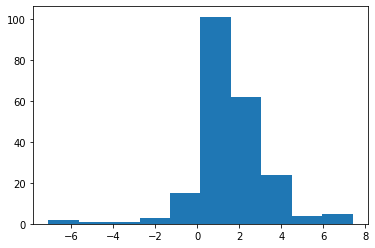

In [3]:
plt.hist(new_df['Female_Minus_Male'])

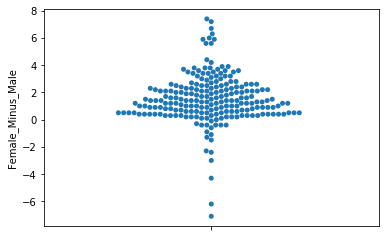

In [4]:
sns.swarmplot(y=new_df['Female_Minus_Male'])

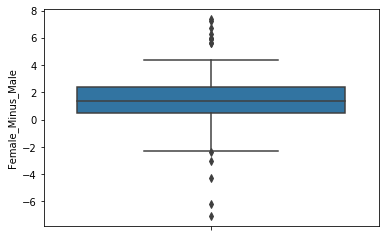

In [5]:
sns.boxplot(y=new_df['Female_Minus_Male'])

This appears to be somewhat of a normal distribution (maybe slightly left skewed), relative to the first distribution which was mostly uniform. Additionally, there are several outliers here, whereas there were no outliers in the previous distribution.

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of this column.

In [6]:
#Mean
np.mean(new_df['Female_Minus_Male'])

1.5096330275229353

In [7]:
#Median
np.median(new_df['Female_Minus_Male'])

1.3499999999999996

In [8]:
#Variance
np.var(new_df['Female_Minus_Male'])

3.2246319754229447

In [9]:
#Standard Deviation
np.std(new_df['Female_Minus_Male'])

1.7957260301680056

In [10]:
#Maximum
np.max(new_df['Female_Minus_Male'])

7.399999999999999

In [11]:
#Minimum
np.min(new_df['Female_Minus_Male'])

-7.100000000000001

In [12]:
#Range
np.max(new_df['Female_Minus_Male']) - np.min(new_df['Female_Minus_Male'])

14.5

In [13]:
#Interquartile Range
new_df['Female_Minus_Male'].quantile(0.75) - new_df['Female_Minus_Male'].quantile(0.25)

1.875

#### 3. Which country has the longest lifespan for females compared to males? Which country has the longest lifespan for males compared to females? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [14]:
#Country with Longest Lifespan for Females Compared to Males
new_df[new_df['Female_Minus_Male'] == np.max(new_df['Female_Minus_Male'])]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
115,Lithuania,43.7,39.7,47.1,Europe,7.4


In [15]:
#Country with Longest Lifespan for Males Compared to Females
new_df[new_df['Female_Minus_Male'] == np.min(new_df['Female_Minus_Male'])]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
205,United Arab Emirates,30.3,32.1,25.0,Asia,-7.1


In [16]:
#Upper Outlier Cutoff
new_df['Female_Minus_Male'].quantile(0.75) + ((new_df['Female_Minus_Male'].quantile(0.75) - new_df['Female_Minus_Male'].quantile(0.25)) * 1.5)

5.1875

In [17]:
#Lower Outlier Cutoff
new_df['Female_Minus_Male'].quantile(0.25) - ((new_df['Female_Minus_Male'].quantile(0.75) - new_df['Female_Minus_Male'].quantile(0.25)) * 1.5)

-2.3125

In [18]:
#Positive Outliers
new_df[new_df['Female_Minus_Male'] > 5.1875]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
18,Belarus,40.0,37.1,43.1,Europe,6.0
60,Estonia,42.7,39.4,46.1,Europe,6.7
68,Georgia,38.1,35.3,40.9,Asia,5.6
69,Georgia,38.1,35.3,40.9,Europe,5.6
109,Latvia,43.6,39.7,46.9,Europe,7.2
115,Lithuania,43.7,39.7,47.1,Europe,7.4
160,Russia,39.6,36.6,42.5,Asia,5.9
161,Russia,39.6,36.6,42.5,Europe,5.9
204,Ukraine,40.6,37.4,43.7,Europe,6.3


In [19]:
#Negative Outliers
new_df[new_df['Female_Minus_Male'] < -2.3125]

,Country/Territory,Average(Years),Male(Years),Female (Years),Continent,Female_Minus_Male
15,Bahrain,32.3,33.8,29.5,Asia,-4.3
106,Kuwait,29.3,30.4,27.4,Asia,-3.0
147,Oman,25.6,26.6,24.2,Asia,-2.4
158,Qatar,33.2,34.3,28.1,Asia,-6.2
205,United Arab Emirates,30.3,32.1,25.0,Asia,-7.1


#### 4. Find the mean, median, and standard deviation of the data grouped by continent. Which continent has the highest absolute difference between its mean and median? What does the difference between mean and median say about the distribution of values for that continent?

In [20]:
new_df.groupby('Continent')['Female_Minus_Male'].mean()

Continent
Africa           0.798000
Asia             0.814583
Europe           3.003704
North America    1.406061
Oceania          1.028571
South America    1.658333
Name: Female_Minus_Male, dtype: float64

In [21]:
new_df.groupby('Continent')['Female_Minus_Male'].median()

Continent
Africa           0.60
Asia             1.20
Europe           2.65
North America    1.10
Oceania          1.00
South America    1.50
Name: Female_Minus_Male, dtype: float64

In [22]:
new_df.groupby('Continent')['Female_Minus_Male'].std()

Continent
Africa           0.685265
Asia             2.417577
Europe           1.654378
North America    1.398200
Oceania          0.863796
South America    0.862827
Name: Female_Minus_Male, dtype: float64

In [23]:
np.abs(new_df.groupby('Continent')['Female_Minus_Male'].mean() - new_df.groupby('Continent')['Female_Minus_Male'].median())

Continent
Africa           0.198000
Asia             0.385417
Europe           0.353704
North America    0.306061
Oceania          0.028571
South America    0.158333
Name: Female_Minus_Male, dtype: float64

Asia has the largest difference between mean and median, suggesting that it has the most skewed distribution of all of the continents.

#### 5. Plot a swarmplot and boxplot of the data grouped by continent.

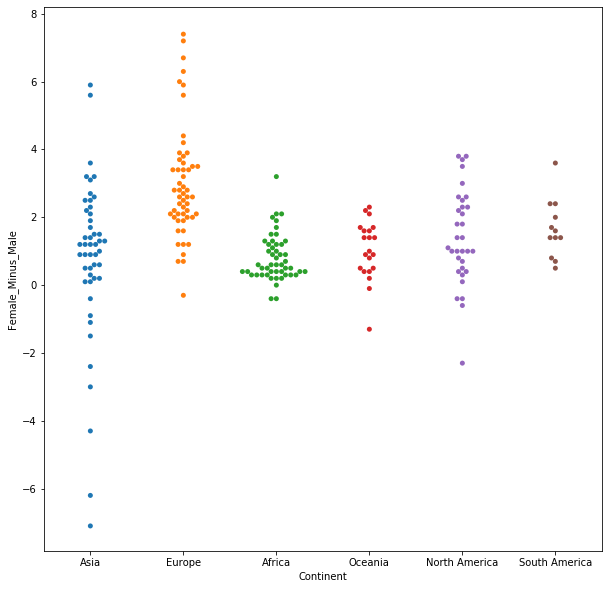

In [24]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='Female_Minus_Male', data=new_df)

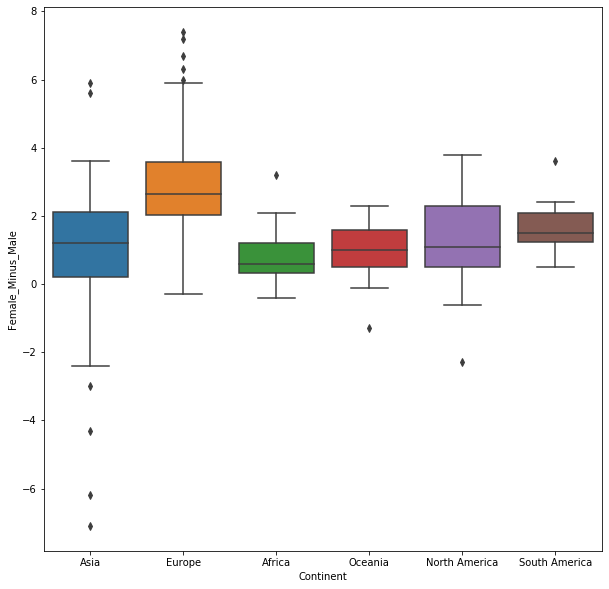

In [25]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Female_Minus_Male', data=new_df)

#### 6. Given your observations from the previous two questions, what may be a cause of why the continent with the largest spread is that way? Hint: Look at the outliers for that country.

Countries from the Middle East seem to have a disproporationate ratio of male lifespan to female lifespan, but they are technically considered Asian.

#### 2. Answer Questions 1 through 10 from here below (please copy and paste each question into its own cell with answers below it). I've loaded in the code for you and cleaned it up a bit.

In [26]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.columns = ['age', 'workingclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df['salary'] = df['salary'].str.strip()
df['native-country'] = df['native-country'].str.strip()

#### 1. How many men and women (sex feature) are represented in this dataset?

In [27]:
df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

#### 2. What is the average age (age feature) of women?

In [28]:
df.groupby('sex')['age'].mean()

sex
 Female    36.858230
 Male      39.433567
Name: age, dtype: float64

#### 3. What is the percentage of German citizens (native-country feature)?

In [29]:
df['native-country'].value_counts(normalize=True)

United-States                 0.895854
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [30]:
df.groupby('salary')['age'].mean()

salary
<=50K    36.783648
>50K     44.249841
Name: age, dtype: float64

In [31]:
df.groupby('salary')['age'].std()

salary
<=50K    14.020365
>50K     10.519028
Name: age, dtype: float64

#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [32]:
df[df['salary'] == '>50K']['education'].value_counts(normalize=True)

 Bachelors       0.283255
 HS-grad         0.213621
 Some-college    0.176891
 Masters         0.122306
 Prof-school     0.053947
 Assoc-voc       0.046040
 Doctorate       0.039026
 Assoc-acdm      0.033797
 10th            0.007907
 11th            0.007652
 7th-8th         0.005101
 12th            0.004209
 9th             0.003443
 5th-6th         0.002041
 1st-4th         0.000765
Name: education, dtype: float64

#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [33]:
df.groupby('race')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
Amer-Indian-Eskimo,311.0,37.173633,12.447130,17.0,28.0,35.0,45.5,82.0
Asian-Pac-Islander,1039.0,37.746872,12.825133,17.0,28.0,36.0,45.0,90.0
Black,3124.0,37.767926,12.759290,17.0,28.0,36.0,46.0,90.0
Other,271.0,33.457565,11.538865,17.0,25.0,31.0,41.0,77.0
White,27815.0,38.769872,13.782554,17.0,28.0,37.0,48.0,90.0


In [34]:
df.groupby('race')['sex'].describe()

,count,unique,top,freq
race,,,,
Amer-Indian-Eskimo,311,2,Male,192
Asian-Pac-Islander,1039,2,Male,693
Black,3124,2,Male,1569
Other,271,2,Male,162
White,27815,2,Male,19173


In [35]:
df.groupby(['race', 'sex'])['age'].describe()

count       mean        std   min   25%   50%  \
race                sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19173.0  39.652532  13.436378  17.0  29.0  38.0   

                               75%   max  
race                sex                   
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [36]:
df[(df['salary'] == '>50K')]['martial-status'].value_counts()

 Married-civ-spouse       6692
 Never-married             491
 Divorced                  463
 Widowed                    85
 Separated                  66
 Married-spouse-absent      34
 Married-AF-spouse          10
Name: martial-status, dtype: int64

In [37]:
df['martial-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: martial-status, dtype: int64

In [38]:
#Married
(6692 + 34 + 10) / (14976 + 418 + 23)

0.43692028280469614

In [39]:
#Single
(491 + 463 + 85 + 66) / (10682 + 4443 + 1025 + 993)

0.0644577961850318

#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [40]:
df[df['hours-per-week'] == df['hours-per-week'].max()].shape

(85, 15)

In [41]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['salary'].value_counts(normalize=True)

<=50K    0.705882
>50K     0.294118
Name: salary, dtype: float64

#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [42]:
df[df['native-country'] == 'Japan'].groupby(['native-country', 'salary'])['hours-per-week'].mean()

native-country  salary
Japan           <=50K     41.000000
                >50K      47.958333
Name: hours-per-week, dtype: float64